## EDA for the "High Yield Corporate Bond" dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("HY_Universe_corporate bond.csv")
df.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1


#### Part1: quantitatively analysis 

<font color=blue>We can see from the first 5 rows that there are missing values in this dataframe, which are represented as Nan.</font>

In [3]:
# Check the format of missing values in thei df
df['Moodys'][0]

'Nan'

In [4]:
# Calculate the number of missing values in each column
for col in df.columns.values:
    missNum = np.sum(np.array(df[col] == 'Nan'))
    if missNum > 0:
        print("The number of missing values in {} is {}.".format(col, missNum))
print("------------------------------------------------")
print("The rest of the columns do not have any missing values.")

The number of missing values in 1st Call Date is 1757.
The number of missing values in Moodys is 161.
The number of missing values in S_and_P is 186.
The number of missing values in Fitch is 1170.
The number of missing values in Bloomberg Composite Rating is 41.
The number of missing values in Months in JNK is 1408.
The number of missing values in Months in HYG is 1408.
The number of missing values in Months in Both is 1408.
------------------------------------------------
The rest of the columns do not have any missing values.


In [5]:
JNK = df['Months in JNK'] == 'Nan'
HYG = df['Months in HYG'] == 'Nan'
Both = df['Months in Both'] == 'Nan'
list(JNK) == list(HYG) and list(HYG) == list(Both)
print("Months in JNK, HYG, and Both have missing values at the same index.")

Months in JNK, HYG, and Both have missing values at the same index.


In [6]:
print("Number of Rows of Data = ", df.shape[0])
print("Number of Columns of Data = ", df.shape[1])

Number of Rows of Data =  2721
Number of Columns of Data =  37


In [7]:
# Check the types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CUSIP                       2721 non-null   object 
 1   Ticker                      2721 non-null   object 
 2   Issue Date                  2721 non-null   object 
 3   Maturity                    2721 non-null   object 
 4   1st Call Date               2721 non-null   object 
 5   Moodys                      2721 non-null   object 
 6   S_and_P                     2721 non-null   object 
 7   Fitch                       2721 non-null   object 
 8   Bloomberg Composite Rating  2721 non-null   object 
 9   Coupon                      2721 non-null   float64
 10  Issued Amount               2721 non-null   float64
 11  Maturity Type               2721 non-null   object 
 12  Coupon Type                 2721 non-null   object 
 13  Maturity At Issue months    2721 

In [8]:
print("The number of unique values for each column is:")
print(df.nunique())

The number of unique values for each column is:
CUSIP                         2721
Ticker                         870
Issue Date                    1545
Maturity                      1108
1st Call Date                  331
Moodys                          45
S_and_P                         41
Fitch                           39
Bloomberg Composite Rating      28
Coupon                         348
Issued Amount                  468
Maturity Type                   12
Coupon Type                     10
Maturity At Issue months      1076
Industry                        69
LiquidityScore                2689
Months in JNK                   65
Months in HYG                   69
Months in Both                  64
IN_ETF                           2
LIQ SCORE                     2689
n_trades                      1691
volume_trades                 2610
total_median_size              394
total_mean_size               2600
n_days_trade                   911
days_diff_max                 1054
percent

In [9]:
cate = df.columns.values[np.array(df.nunique() < 100)]
print("Using a threshold of 100, we conclude that there are {} categorical variables.".format(len(cate)))
print("They are", cate)

Using a threshold of 100, we conclude that there are 13 categorical variables.
They are ['Moodys' 'S_and_P' 'Fitch' 'Bloomberg Composite Rating' 'Maturity Type'
 'Coupon Type' 'Industry' 'Months in JNK' 'Months in HYG' 'Months in Both'
 'IN_ETF' 'bond_type' 'weekly_median_ntrades']


In [10]:
# Summary Statistics for Attributes and Label
df.describe()

,Coupon,Issued Amount,Maturity At Issue months,LiquidityScore,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
count,2721.000000,2.721000e+03,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2.721000e+03,2.721000e+03,2721.000000,...,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2.721000e+03,2.721000e+03,2.721000e+03,2721.000000,2721.000000
mean,10.307872,8.299295e+08,113.968997,18.218230,0.182182,2700.696435,7.222372e+08,5.361476e+05,5.255853e+05,316.581771,...,0.244306,0.676536,3.496141,0.379648,7.588325e+06,5.672609e+06,4.915523e+07,6.690499e+05,21.598988,2.471885
std,63.051382,5.802790e+08,101.893176,7.872071,0.078721,5572.262205,1.027825e+09,4.193546e+05,2.670677e+05,347.802629,...,0.152165,0.219661,1.712004,0.144545,8.979311e+06,7.340321e+06,6.703860e+07,3.094537e+06,32.901129,5.581749
min,0.000000,3.700000e+08,11.930000,4.388758,0.043888,1.000000,7.000000e+03,4.000000e+03,5.000000e+03,1.000000,...,0.000000,0.000000,1.000000,0.000000,7.000000e+03,7.000000e+03,7.000000e+03,1.400000e+01,1.000000,1.000000
25%,5.000000,5.000000e+08,65.170000,12.738630,0.127386,116.000000,6.189000e+07,7.500000e+04,3.010473e+05,45.000000,...,0.124731,0.534224,1.000000,0.290826,2.295273e+06,1.750000e+06,9.020000e+06,2.100000e+04,4.046154,1.000000
50%,6.250000,6.500000e+08,97.370000,16.538471,0.165385,674.000000,3.480000e+08,5.000000e+05,5.769231e+05,184.000000,...,0.250000,0.681992,5.000000,0.376385,4.926339e+06,3.527000e+06,2.410000e+07,1.060000e+05,10.821429,1.000000
75%,7.750000,1.000000e+09,121.770000,22.120108,0.221201,2467.000000,9.328420e+08,1.000000e+06,7.289650e+05,483.000000,...,0.356808,0.859256,5.000000,0.448718,9.649299e+06,7.011000e+06,6.370500e+07,4.300000e+05,24.526316,2.000000
max,999.000000,7.364026e+09,1217.570000,54.673908,0.546739,57935.000000,8.979960e+09,3.400000e+06,3.400000e+06,1667.000000,...,1.000000,1.000000,5.000000,1.000000,1.179500e+08,1.179500e+08,8.728140e+08,1.002500e+08,513.769231,160.000000


#### Part2: visually analysis 

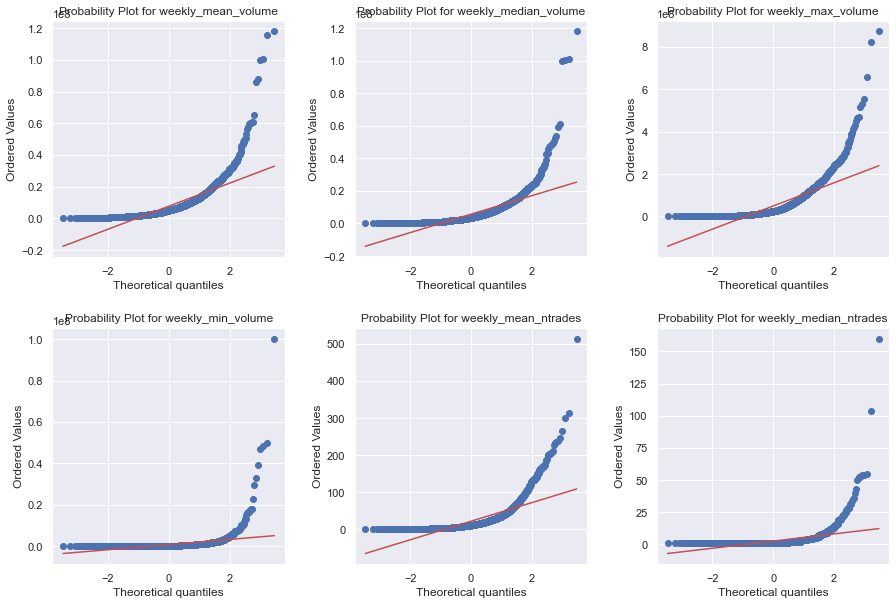

In [11]:
# Generate QQ-Plots for the weekly features, and assume they are following the normal distribution
weekly_stats = ['weekly_mean_volume', 'weekly_median_volume', 'weekly_max_volume', 
                'weekly_min_volume', 'weekly_mean_ntrades', 'weekly_median_ntrades']
fig = plt.figure(figsize = (15,10))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

for i in range(1, 7):
    plt.subplot(2, 3, i)
    stats.probplot(df[weekly_stats[i-1]], dist = "norm", plot = plt)
    plt.title('Probability Plot for ' + weekly_stats[i-1])

*We can see that they do not follow the straight line well, so we try uniform distribution as well.*

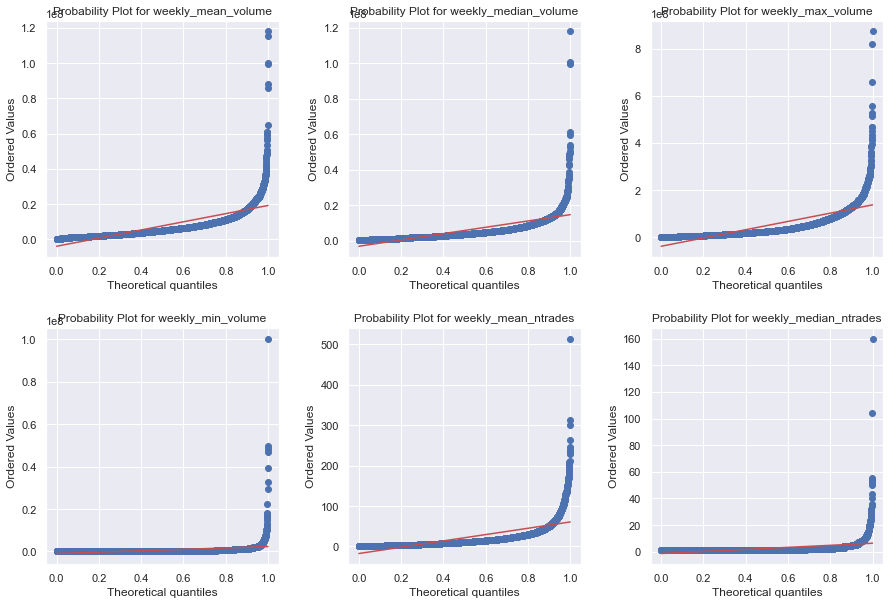

In [12]:
# Generate QQ-Plots for the weekly features, and assume they are following the normal distribution
weekly_stats = ['weekly_mean_volume', 'weekly_median_volume', 'weekly_max_volume', 
                'weekly_min_volume', 'weekly_mean_ntrades', 'weekly_median_ntrades']
fig = plt.figure(figsize = (15,10))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

for i in range(1, 7):
    plt.subplot(2, 3, i)
    stats.probplot(df[weekly_stats[i-1]], dist = "uniform", plot = plt)
    plt.title('Probability Plot for ' + weekly_stats[i-1])

*The points in lower tails are far away from the straight line.*

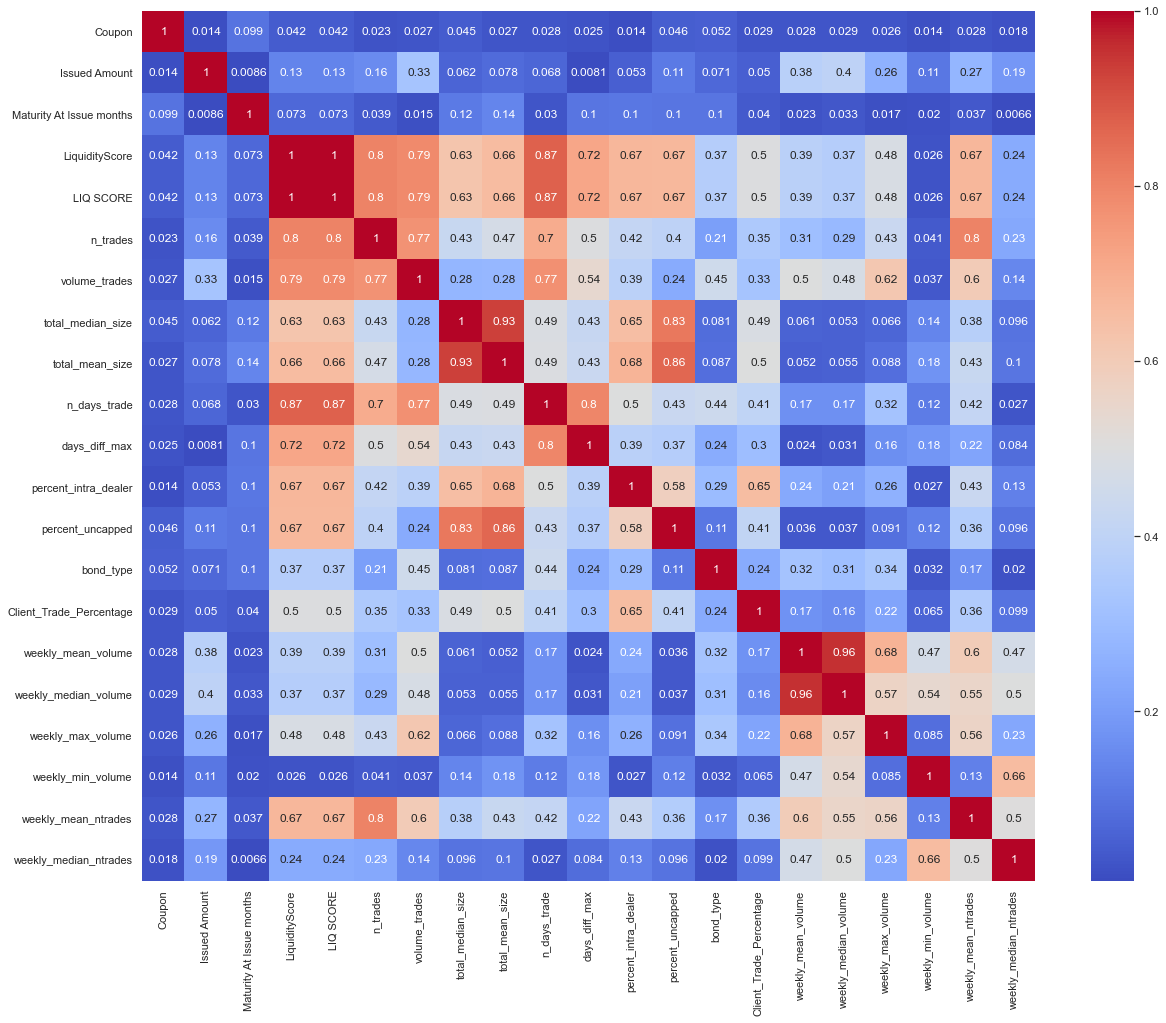

In [13]:
# Plot the absolute value of the corr heatmap
corr_matrix = df.corr().abs()
plt.figure(figsize = (20,16))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

<Figure size 1440x1152 with 0 Axes>

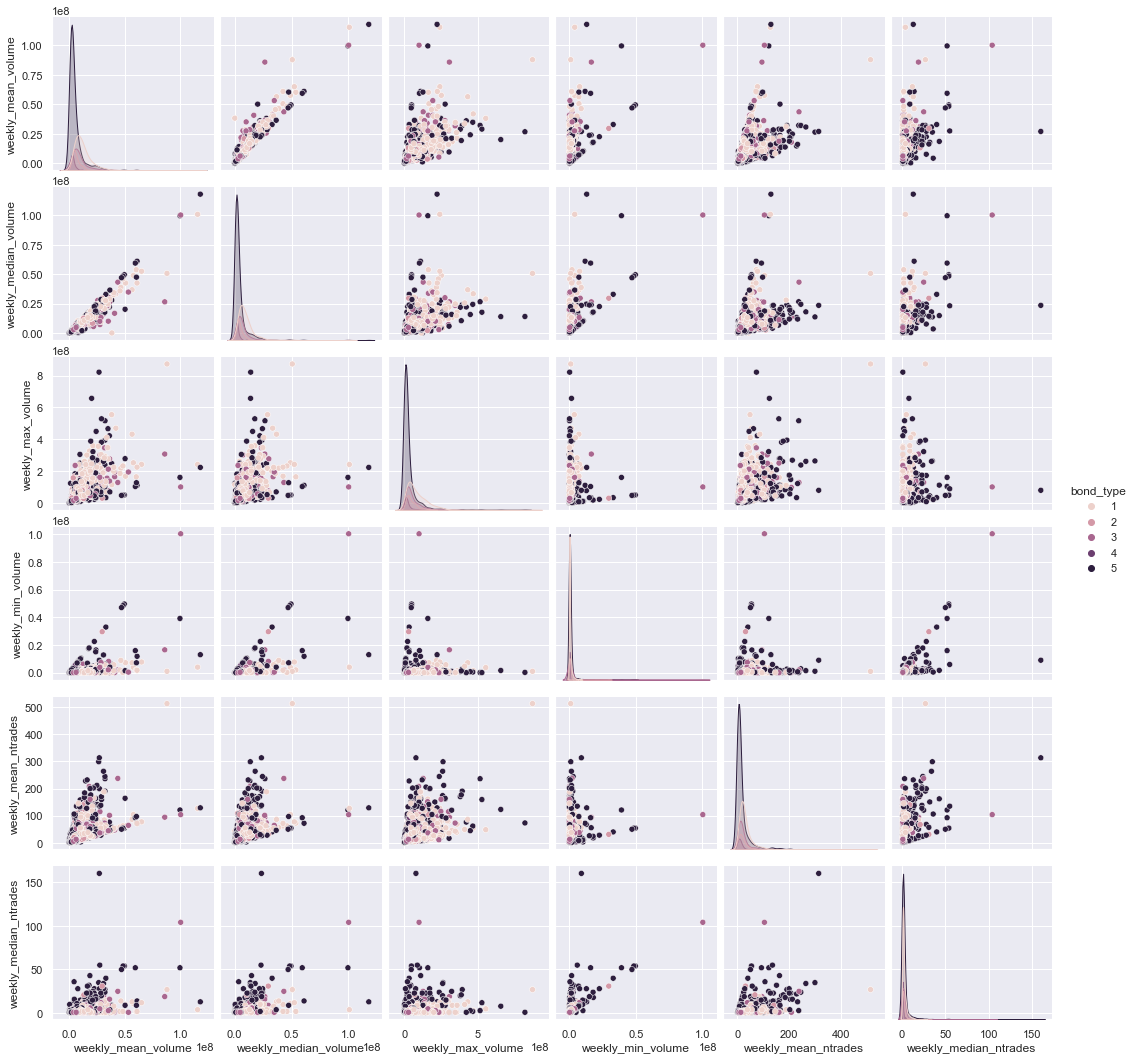

In [14]:
# Color the weekly features' pairs plot by the bond_type
plt.figure(figsize = (20,16))
sns.pairplot(df[['weekly_mean_volume', 'weekly_median_volume', 'weekly_max_volume', 
                'weekly_min_volume', 'weekly_mean_ntrades', 'weekly_median_ntrades', 'bond_type']],
       hue = "bond_type")
plt.show()

In [15]:
print("My name is {Jinglun Gao}")
print("My NetID is: {jinglun3}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Jinglun Gao}
My NetID is: {jinglun3}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
